In [1]:
import os
import sys

path = os.getcwd()
while os.path.basename(os.path.normpath(path)) != 'mejiro':
    path = os.path.dirname(path)
repo_path = path
if repo_path not in sys.path:
    sys.path.append(repo_path)

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from glob import glob

from mejiro.lenses.test import SampleSkyPyStrongLens
from mejiro.plots import diagnostic_plot, plot
from mejiro.utils import util
from mejiro.analysis import stats

plt.style.use(f'{repo_path}/mejiro/mplstyle/science.mplstyle')

In [3]:
array_dir_grid = os.path.join(repo_path, 'output', 'arrays', 'diagnostics', 'grid_oversampling')
array_dir_samples = os.path.join(repo_path, 'output', 'arrays', 'diagnostics', 'num_samples')

figure_dir_grid = os.path.join(repo_path, 'figures', 'diagnostics', 'grid_oversampling')
figure_dir_samples = os.path.join(repo_path, 'figures', 'diagnostics', 'num_samples')

util.create_if_not_exists(array_dir_grid)
util.create_if_not_exists(array_dir_samples)
util.create_if_not_exists(figure_dir_grid)
util.create_if_not_exists(figure_dir_samples)

# grid_list = glob(array_dir_grid + '/grid_oversampling_*.npy')
# samples_list = glob(array_dir_samples + '/num_samples_*.npy')

In [4]:
def get_sec(time_str):
    h, m, s = time_str.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)

In [5]:
execution_times_grid = np.load(os.path.join(array_dir_grid, 'execution_times_grid_oversampling.npy'))
print(execution_times_grid)

execution_times_grid = [get_sec(i) for i in execution_times_grid]
print(execution_times_grid)

['0:02:31' '0:14:06' '0:28:32' '0:40:32' '0:53:27' '1:04:27']
[151, 846, 1712, 2432, 3207, 3867]


In [6]:
point_source_count_grid = np.load(os.path.join(array_dir_grid, 'point_source_count_grid_oversampling.npy'))
print(point_source_count_grid)

[ 1930 10699 20971 31353 40968 49347]


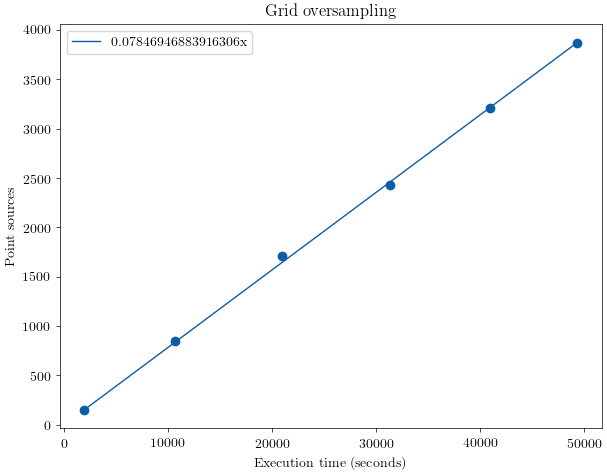

In [18]:
x_fit, y_fit, c = stats.linear_fit_through_origin(point_source_count_grid, execution_times_grid)

plt.plot(x_fit, y_fit, label=f'{c}x')
plt.scatter(point_source_count_grid, execution_times_grid)
plt.title('Varying grid oversampling factor')
plt.xlabel('Execution time (seconds)')
plt.ylabel('Point sources')
plt.legend()
plt.show()

In [8]:
execution_times_samples = np.load(os.path.join(array_dir_samples, 'execution_times_num_samples.npy'))
print(execution_times_samples)

execution_times_samples = [get_sec(i) for i in execution_times_samples]
print(execution_times_samples)

['0:01:09' '0:05:18' '0:09:42' '0:32:06' '0:47:28' '1:31:47' '1:58:20']
[69, 318, 582, 1926, 2848, 5507, 7100]


In [9]:
point_source_count_samples = np.load(os.path.join(array_dir_samples, 'point_source_count_num_samples.npy'))
print(point_source_count_samples)

[  979  4566  8459 27806 41090 79106 99435]


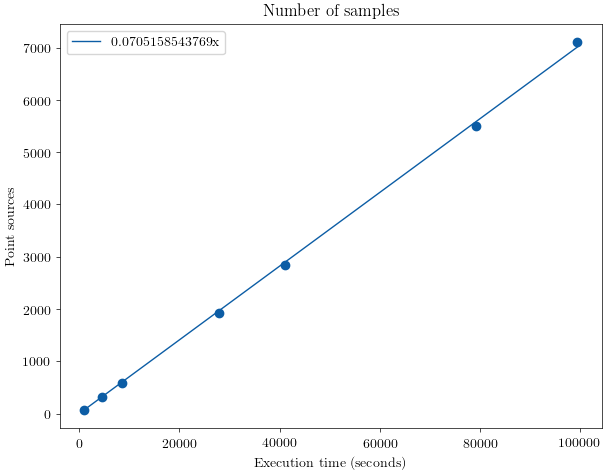

In [21]:
x_fit, y_fit, c = stats.linear_fit_through_origin(point_source_count_samples, execution_times_samples)

plt.plot(x_fit, y_fit, label=f'{c}x')
plt.scatter(point_source_count_samples, execution_times_samples)
plt.title('Varying number of samples')
plt.xlabel('Execution time (seconds)')
plt.ylabel('Point sources')
plt.legend()
plt.show()

In [11]:
# combine into tuple
grid_data = np.column_stack((point_source_count_grid, execution_times_grid))
sample_data = np.column_stack((point_source_count_samples, execution_times_samples))
total_data = np.concatenate([grid_data, sample_data])

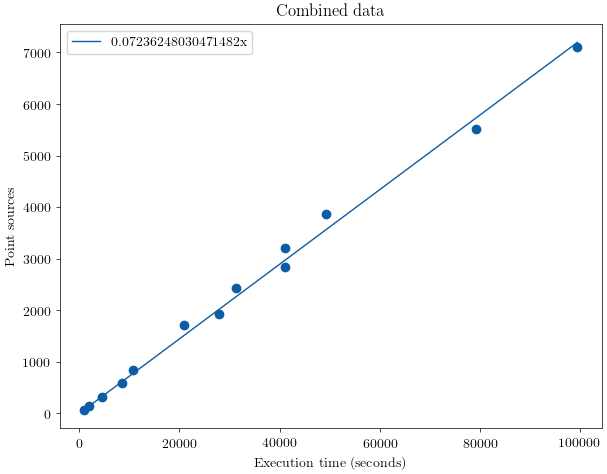

In [36]:
x, y = total_data.T
x_fit, y_fit, c = stats.linear_fit_through_origin(x, y)

plt.plot(x_fit, y_fit, label=f'{c}x')
plt.scatter(x, y)
plt.title('Combined data')
plt.xlabel('Execution time (seconds)')
plt.ylabel('Point sources')
plt.legend()
plt.show()